# Initial Dataset Exploration

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
df = pd.read_csv('../data/all_fares_cleaned.csv')

In [5]:
print(df.shape)

(44, 6)


In [6]:
df.head()

,Month,Year,Average Uber Total Fare,Average Uber Base Fare,Average Lyft Total Fare,Average Lyft Base Fare
0,2,2021,23.891282,19.209456,24.916026,19.209456
1,2,2024,30.003911,24.537868,28.991807,24.537868
2,9,2023,32.927748,26.916275,29.176778,26.916275
3,10,2019,21.653333,18.084945,74.210000,18.084945
4,6,2022,31.411499,25.491931,29.613316,25.491931


## Base Passenger Fares
What is the distribution of base passenger fares between each service?

In [29]:
def fare_analysis(var, color):
    # Show statisitcs
    print(df[var].describe())

    # Create box plot
    df[var].plot.box(
        patch_artist=True,  # Enable custom colors
        boxprops=dict(facecolor=color, color='blue'),  # box
        medianprops=dict(color='red', linewidth=2),  # median line
        whiskerprops=dict(color='blue', linewidth=1.5),  # whiskers
        capprops=dict(color='blue', linewidth=1.5),  # caps
        flierprops=dict(marker='o', color='orange', alpha=0.5),  # outliers
    )

    plt.title(f"{var} Distribution", fontsize=14, fontweight='bold')
    plt.ylabel('Average Fares')

    # Customizing the grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Adding some padding
    plt.tight_layout()

    plt.show()

    # Create a kernel density plot for the compound score
    sns.kdeplot(df[var], 
                color=color,  # Set line color
                fill=True,  # Fill under the KDE curve
                alpha=0.4,  # Transparency of the fill
                linewidth=2)  # Thickness of the line

    # Add title and labels
    plt.title(f"{var} Density", fontsize=14, fontweight='bold')
    plt.xlabel('Average Fares')  # X-axis label
    plt.ylabel('Density')  # Y-axis label

    # Add a grid with custom style
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Improve layout
    plt.tight_layout()

    # Display the plot
    plt.show()

count    44.000000
mean     23.884214
std       2.627712
min      15.598487
25%      22.659031
50%      24.462455
75%      25.853234
max      27.307561
Name: Average Uber Base Fare, dtype: float64


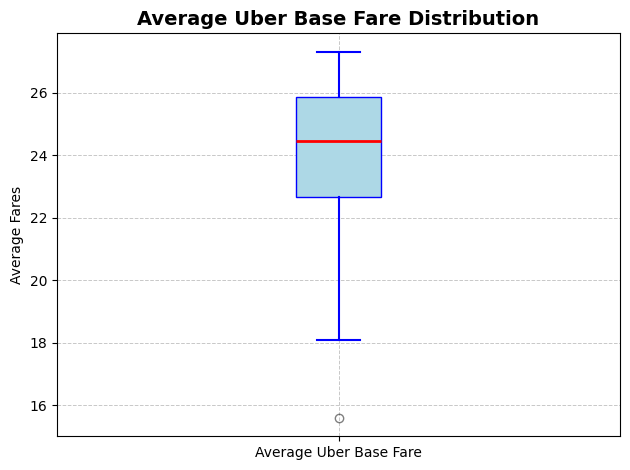

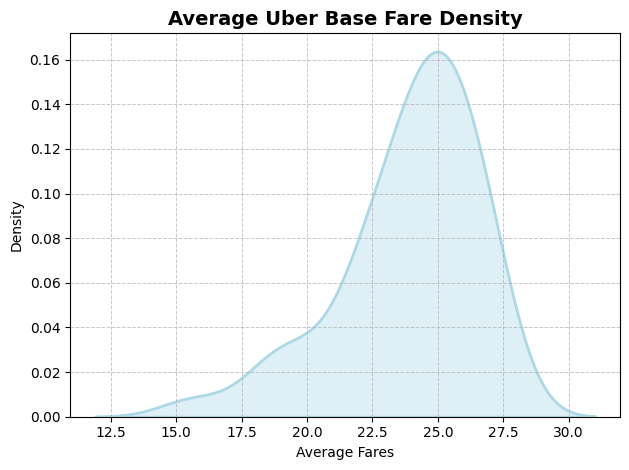

In [26]:
fare_analysis('Average Uber Base Fare', 'lightblue')

count    44.000000
mean     23.884214
std       2.627712
min      15.598487
25%      22.659031
50%      24.462455
75%      25.853234
max      27.307561
Name: Average Lyft Base Fare, dtype: float64


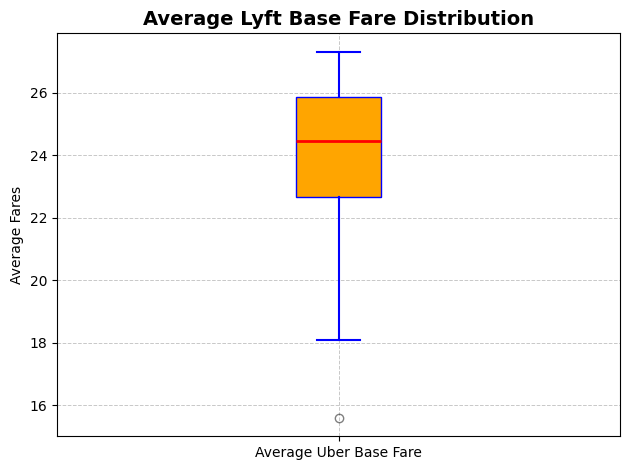

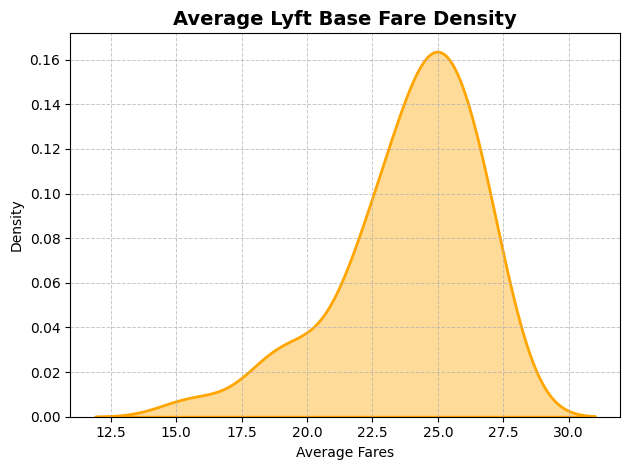

In [27]:
fare_analysis('Average Lyft Base Fare', 'orange')

## Average Total Fares
What is the distribution of average total fares between each service?

count    44.000000
mean     29.328034
std       3.252366
min      17.079130
25%      27.971511
50%      29.884684
75%      31.507507
max      33.286359
Name: Average Uber Total Fare, dtype: float64


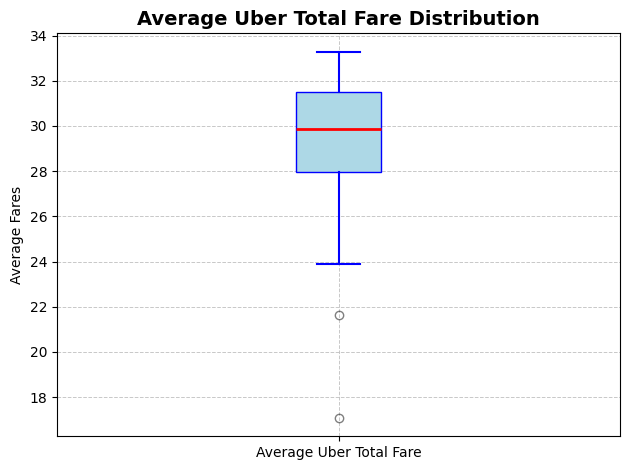

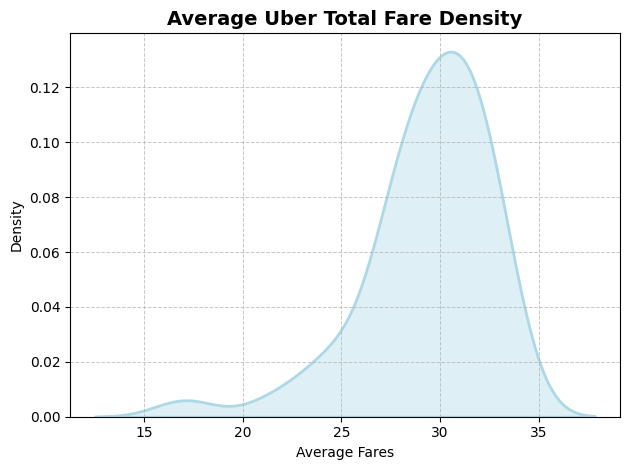

In [30]:
fare_analysis('Average Uber Total Fare', 'lightblue')

count    44.000000
mean     29.361307
std       7.228896
min      23.362717
25%      27.274449
50%      28.328590
75%      29.329067
max      74.210000
Name: Average Lyft Total Fare, dtype: float64


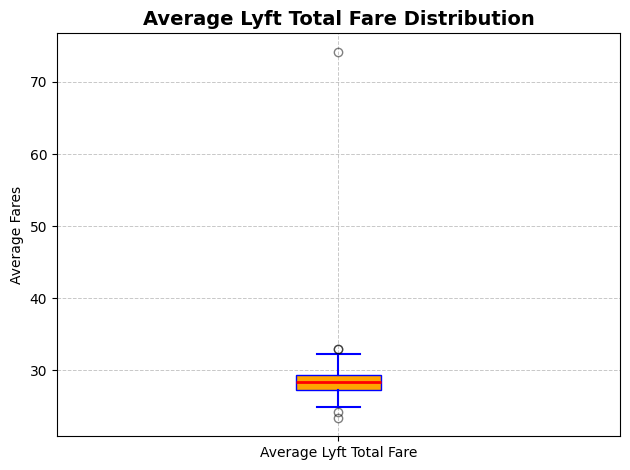

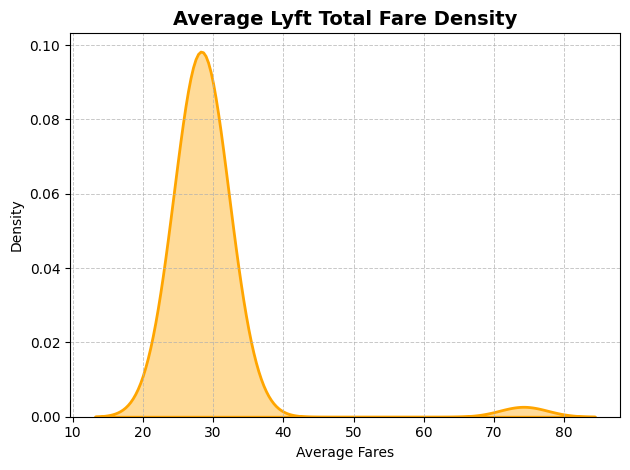

In [31]:
fare_analysis('Average Lyft Total Fare', 'orange')

## Monthly Distribution
Were there months when the average total ride fare for each service was unusually higher or lower?

In [69]:
def monthyear_analysis(month_year, var, color):
    print(df.groupby(month_year)[var].describe())

    ax = df.groupby(month_year)[var].median().plot.bar(color=color)

    if month_year == "Month":
        labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
        ax.set_xticklabels(labels)

    plt.title(f"{month_year}ly Median of {var}", fontsize=14, fontweight='bold')
    plt.ylabel(f'{month_year}ly Median of Average Fares')

    # Adding some padding
    plt.tight_layout()

    plt.show()

       count       mean       std        min        25%        50%        75%  \
Month                                                                           
1        5.0  24.987609  4.827398  17.079130  24.340883  26.495023  27.257554   
2        3.0  27.279302  3.109846  23.891282  25.916997  27.942712  28.973311   
3        4.0  29.385245  1.548529  27.981111  28.303512  29.067764  30.149496   
4        6.0  30.516056  2.938905  24.924656  30.392420  31.229361  32.042210   
5        3.0  29.249385  2.557271  26.956117  27.870567  28.785017  30.396018   
6        3.0  32.147630  0.766769  31.411499  31.750572  32.089646  32.515695   
7        4.0  29.977564  1.225291  28.569768  29.266100  29.956772  30.668235   
8        4.0  30.191409  1.686805  28.452702  29.160862  29.970154  31.000701   
9        2.0  31.276530  2.335174  29.625312  30.450921  31.276530  32.102139   
10       5.0  28.227843  4.234024  21.653333  27.766335  28.098871  30.673344   
11       3.0  31.842025  1.4

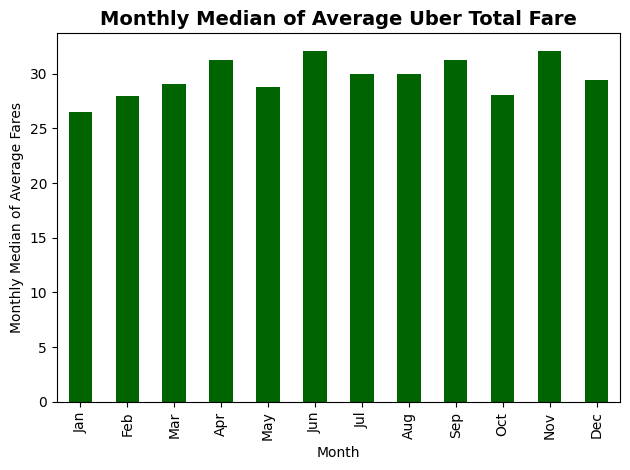

In [70]:
monthyear_analysis("Month", "Average Uber Total Fare", "darkgreen")

       count       mean        std        min        25%        50%  \
Month                                                                 
1        5.0  25.238232   1.861767  23.362717  24.150237  25.171665   
2        3.0  26.680443   2.092214  24.916026  25.524762  26.133497   
3        4.0  28.860646   3.063996  26.267334  26.279974  28.440959   
4        6.0  29.577777   2.131263  27.558850  28.187437  28.677373   
5        3.0  29.126106   0.821685  28.490683  28.662150  28.833616   
6        3.0  30.587018   2.062030  29.192143  29.402729  29.613316   
7        4.0  28.563137   1.980530  26.470187  27.727283  28.269442   
8        4.0  27.999342   0.479322  27.331401  27.830722  28.117608   
9        2.0  29.136440   0.057047  29.096101  29.116271  29.136440   
10       5.0  37.588466  20.480286  27.764212  28.042760  28.657076   
11       3.0  28.720061   1.405493  27.097302  28.304361  29.511420   
12       2.0  27.495543   0.554299  27.103595  27.299569  27.495543   

     

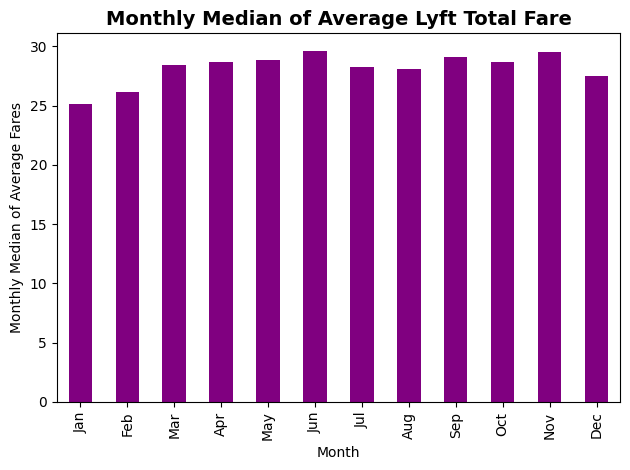

In [71]:
monthyear_analysis("Month", "Average Lyft Total Fare", "purple")

## Yearly Distribution
Were there years when the average total ride fare for each service was unusually higher or lower?

      count       mean       std        min        25%        50%        75%  \
Year                                                                           
2019    1.0  21.653333       NaN  21.653333  21.653333  21.653333  21.653333   
2020    1.0  27.981111       NaN  27.981111  27.981111  27.981111  27.981111   
2021   11.0  26.523125  3.559626  17.079130  25.940386  27.766335  28.511235   
2022   12.0  29.711975  2.345440  24.340883  29.150432  30.303726  31.350184   
2023   12.0  30.991917  1.938635  27.257554  30.242636  31.383225  32.336847   
2024    7.0  31.513994  1.328434  29.765457  30.714126  31.426943  32.345472   

            max  
Year             
2019  21.653333  
2020  27.981111  
2021  29.625312  
2022  32.372629  
2023  33.148415  
2024  33.286359  


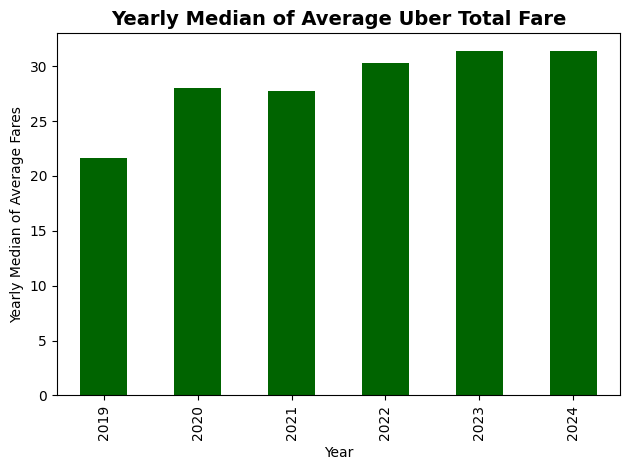

In [72]:
monthyear_analysis("Year", "Average Uber Total Fare", "darkgreen")

      count       mean       std        min        25%        50%        75%  \
Year                                                                           
2019    1.0  74.210000       NaN  74.210000  74.210000  74.210000  74.210000   
2020    1.0  32.293333       NaN  32.293333  32.293333  32.293333  32.293333   
2021   11.0  27.541501  1.780132  23.362717  27.661531  27.997163  28.573880   
2022   12.0  27.332963  1.691643  24.150237  26.423687  27.217498  28.239588   
2023   12.0  28.167641  1.497403  25.171665  27.676570  28.685323  29.211178   
2024    7.0  30.918631  1.795417  28.264610  29.794769  31.243477  32.188598   

            max  
Year             
2019  74.210000  
2020  32.293333  
2021  29.096101  
2022  30.054018  
2023  29.551461  
2024  32.955595  


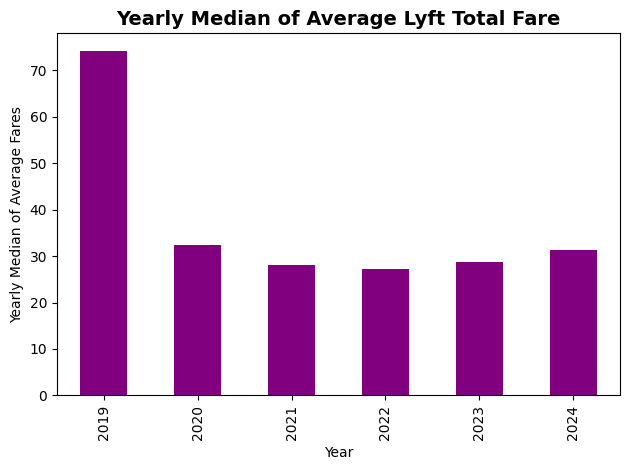

In [74]:
monthyear_analysis("Year", "Average Lyft Total Fare", "purple")